<a href="https://colab.research.google.com/github/tarek-moh/Jigsaw-puzzle-solver/blob/main/jigsaw_puzzle_solver.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import matplotlib.pyplot as plt
import os
import math

In [2]:
def readImage(path):
    """
    Reads an image from disk using OpenCV.

    Parameters
    ----------
    path : str
        Path to the image file.

    Returns
    -------
    numpy.ndarray or None
        The loaded image in BGR format, or None if the file does not exist.

    Notes
    -----
    - The function prints an error message if the file is not found.
    - No exception is raised when the image is missing; the caller must check for None.
    """
    if not os.path.exists(path):
        print(f"Image not found at {path}")
        return None

    return cv2.imread(path)


In [3]:
def showImage(img, pltx=5, plty=5):
    """
    Displays an image using Matplotlib.

    Parameters
    ----------
    img : numpy.ndarray
        Image array in BGR format (OpenCV default).
    pltx : int, optional
        Width of the Matplotlib figure (default: 5).
    plty : int, optional
        Height of the Matplotlib figure (default: 5).

    Notes
    -----
    - Converts BGR to RGB before displaying.
    - Prints an error message if img is None.
    """
    if img is None:
        print("Failed to load image.")
        return

    # Convert from BGR (OpenCV) to RGB (Matplotlib)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(pltx, plty))
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.title("Sample Image")
    plt.show()


In [4]:
def divide_image(image, number):
    """
    Divides an image into equal-sized grid pieces.

    Parameters
    ----------
    image : numpy.ndarray
        The input image to divide.
    number : int
        Total number of pieces. Must be a perfect square
        (e.g., 4 for 2x2, 9 for 3x3, 16 for 4x4).

    Returns
    -------
    list of numpy.ndarray
        A list containing each image piece in row-major order.

    Raises
    ------
    ValueError
        - If `number` is not a perfect square.
        - If the image dimensions are not divisible by the grid size.

    Example
    -------
    pieces = divide_image(img, 4)   # returns 4 equal pieces (2x2)
    """
    # Validate that number is a perfect square
    if not math.isqrt(number) == math.sqrt(number):
        raise ValueError("The 'number' of pieces must be a perfect square (e.g., 4, 9, 16).")

    grid_size = int(math.sqrt(number))
    pieces = []
    height, width, _ = image.shape

    # Validate that the image can be evenly divided
    if height % grid_size != 0 or width % grid_size != 0:
        raise ValueError("Image dimensions are not perfectly divisible by the grid size.")

    piece_height = height // grid_size
    piece_width = width // grid_size

    # Extract each piece
    for i in range(grid_size):
        for j in range(grid_size):
            y_start = i * piece_height
            y_end = (i + 1) * piece_height
            x_start = j * piece_width
            x_end = (j + 1) * piece_width

            piece = image[y_start:y_end, x_start:x_end]
            pieces.append(piece)

    return pieces


In [5]:
import numpy as np

def extract_strips(image, border=1):
    """
    Returns unified edge strips with shape (length, channels), all vertical.
    Order: [top, right, bottom, left]
    """
    # Extract raw strips
    top = image[:border, :, :]       # (b, W, C)
    bottom = image[-border:, :, :]   # (b, W, C)
    left = image[:, :border, :]      # (H, b, C)
    right = image[:, -border:, :]    # (H, b, C)

    # Rotate top/bottom to become vertical
    bottom = np.rot90(bottom, k=1)   # rotate 90deg counter-clockwise
    top = np.rot90(top, k=1)         # rotate 90deg counter-clockwise
    # left/right already vertical

    bottom = np.flip(bottom, axis=1)   # flip border dimension
    right = np.flip(right, axis=1)   # flip border dimension


    return [top, right, bottom, left]


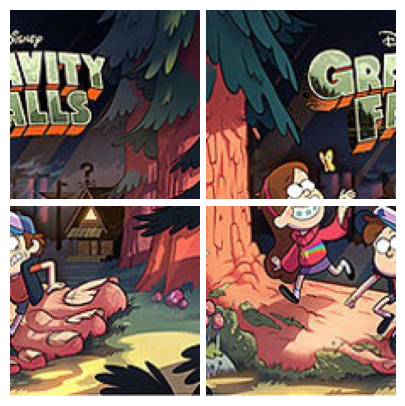

In [10]:
base_path = "./puzzles/Gravity Falls"
puzzle2x2 = readImage(f"{base_path}/puzzle_2x2/0.jpg")
pieces = divide_image(puzzle2x2, 4)

def showPieces(pieces):
  num_pieces = len(pieces)
  grid_size = int(math.sqrt(num_pieces))

  plt.figure(figsize=(4, 4))
  for i, piece in enumerate(pieces):
      plt.subplot(grid_size, grid_size, i + 1)
      plt.imshow(cv2.cvtColor(piece, cv2.COLOR_BGR2RGB))
      plt.axis('off')
  plt.tight_layout(pad=0.5)
  plt.show()

showPieces(pieces)

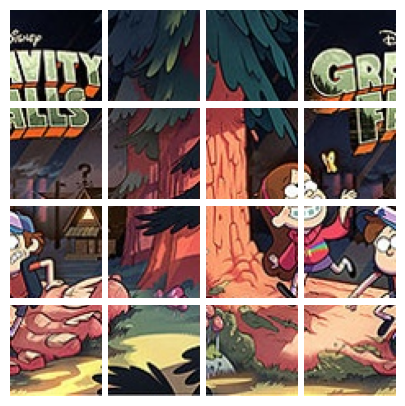

In [ ]:
puzzle4x4 = readImage(f"Gravity Falls/puzzle_4x4/0.jpg")
pieces = divide_image(puzzle2x2, 16)
showPieces(pieces)

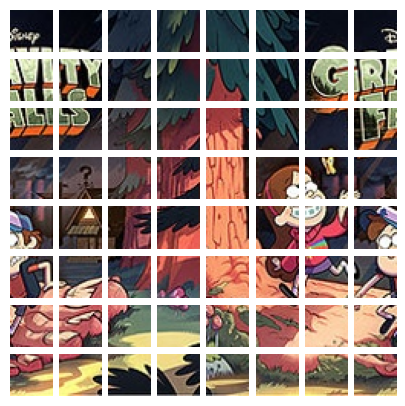

(28, 28, 3)

In [96]:
puzzle4x4 = readImage('/content/drive/MyDrive/Content/Gravity Falls/puzzle_8x8/0.jpg')
pieces = divide_image(puzzle2x2, 64)
showPieces(pieces)

# Example Strips of two puzzle pieces

this example containts two pieces, where the 2nd one is actually below the first piece in the correctly assembelled puzzle.

here I made the strip size equal to half of the original pieces, we can see that indeed the bottom of the upper piece matches the top of the lower piece


---


*NOTE: comparison is index wise comparision left->right*

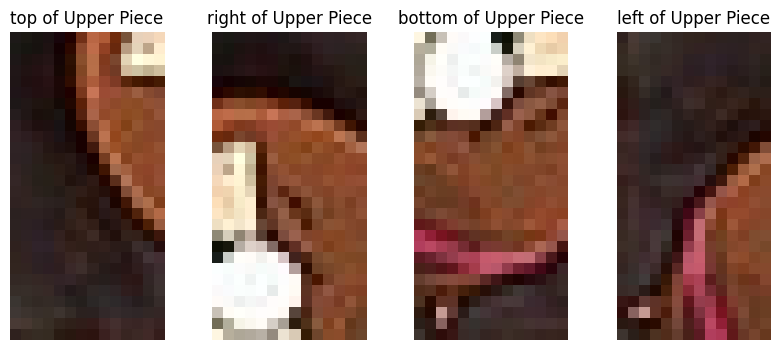

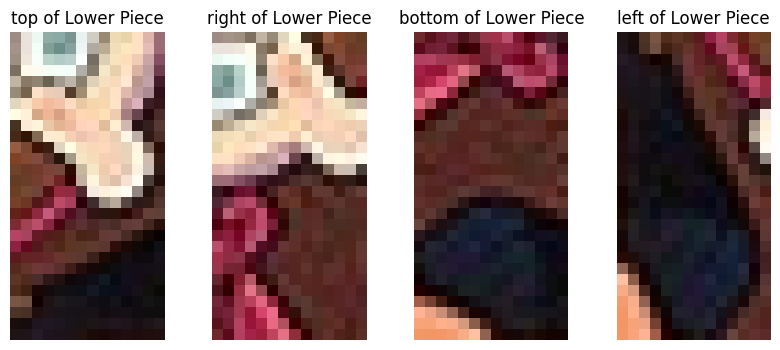

In [131]:
strips = extract_strips(pieces[29],14)
strips1 = extract_strips(pieces[37],14)
plt.figure(figsize=(10,4))

strip_names = ["top", "right", "bottom", "left"]

# Upper Piece
for i, strip in enumerate(strips):
  plt.subplot(1,4,i+1)
  plt.imshow(cv2.cvtColor(strip, cv2.COLOR_BGR2RGB))
  plt.title(strip_names[i] + " of Upper Piece")
  plt.axis('off')

# Lower Piece
plt.figure(figsize=(10,4))
for i, strip in enumerate(strips1):
  plt.subplot(1,4,i+1)
  plt.imshow(cv2.cvtColor(strip, cv2.COLOR_BGR2RGB))
  plt.title(strip_names[i] + " of Lower Piece")
  plt.axis('off')

This example containts two pieces, where the 2nd one is actually on the RHS of the first piece in the correctly assembelled puzzle.

and agian we see that the right of the left piece matches the left of the right piece

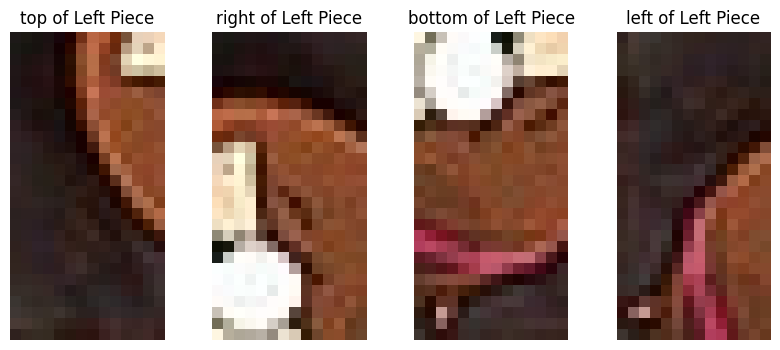

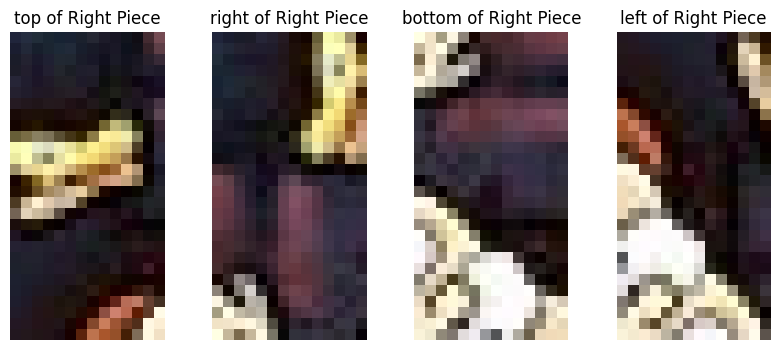

In [130]:
strips = extract_strips(pieces[29],14)
strips1 = extract_strips(pieces[30],14)
plt.figure(figsize=(10,4))

strip_names = ["top", "right", "bottom", "left"]

# Left Piece
for i, strip in enumerate(strips):
  plt.subplot(1,4,i+1)
  plt.imshow(cv2.cvtColor(strip, cv2.COLOR_BGR2RGB))
  plt.title(strip_names[i] + " of Left Piece")
  plt.axis('off')

# Right Piece
plt.figure(figsize=(10,4))
for i, strip in enumerate(strips1):
  plt.subplot(1,4,i+1)
  plt.imshow(cv2.cvtColor(strip, cv2.COLOR_BGR2RGB))
  plt.title(strip_names[i] + " of Right Piece")
  plt.axis('off')